# Day-44 Time Series Decomposition

Welcome to Day 44! In day 43, we broke down a time series into its core components: 
- Trend, 
- Seasonality, 
- and Noise. 

Today, we're going to get practical: we'll learn how to formally separate those components using a powerful technique called Time Series Decomposition.

Understanding decomposition is critical because it allows us to analyze each component individually, which is essential for accurate forecasting.

## Topics Covered:

- Additive vs. Multiplicative Models
- STL Decomposition

## Additive vs. Multiplicative Models

The first choice you face when decomposing a time series is deciding how the components interact. There are two primary models:

### 1. The Additive Model

The additive model assumes that the magnitude of the seasonality *does not change* as the trend increases. The components simply *add up* to the observed value. This model is best used when the time series exhibits a relatively constant trend and seasonality throughout its duration.

$ Y_t = T_t + S_t + R_t $

- `Analogy`: Imagine your weekly ice cream sales. If the seasonal summer spike always adds about 50 units to your baseline sales, regardless of how high the baseline gets, you have an additive model. The seasonal fluctuation is constant.

### 2.The Multiplicative Model

The multiplicative model assumes that the magnitude of the seasonality increases as the trend increases. The components are multiplied together to form the observed value. This model is best used when the time series shows increasing variance over time, meaning the seasonal peaks and troughs get larger as the overall level of the series rises.

$ Y_t = T_t × S_t × R_t $

- `Analogy`: Using the ice cream example, if your seasonal summer spike is always 20% of your current baseline sales, the spike will be much bigger when your baseline is high than when it's low. The seasonal fluctuation scales with the trend.

Pro Tip: If you're unsure which model to use, look at the seasonality over time:

- Constant width of seasonal fluctuations → Additive.

- Wider width of seasonal fluctuations (like a widening cone) → Multiplicative.

##  STL Decomposition

While simpler methods like classical decomposition (moving averages) exist, the gold standard for robust decomposition is the STL (Seasonal-Trend decomposition using Loess) method.

### What is STL?

STL is an acronym for Seasonal and Trend decomposition using Loess. Loess (Locally Estimated Scatterplot Smoothing) is a non-parametric method for smoothing curves.

### Why is STL awesome?

1. Handles Any Type of Seasonality: Unlike other methods, STL can handle any type of seasonality (e.g., daily, weekly, yearly) and even multiple seasonal periods simultaneously.

2. Robust to Outliers: It's highly robust to outliers, meaning a few extreme data points won't ruin your trend and seasonality estimates.

3. Flexibility: You can control the degree of smoothing for both the trend and the seasonal components independently.

4. Additive Model: By default, STL uses an additive decomposition, but you can easily convert a multiplicative series to an additive one by taking the logarithm of your data first! (Since $$log(T×S×R)=log(T)+log(S)+log(R)$$

### Code Example: Decomposing a Time Series

In [3]:
! pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 9.6/9.6 MB 50.2 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ---------------

<Figure size 1200x800 with 0 Axes>

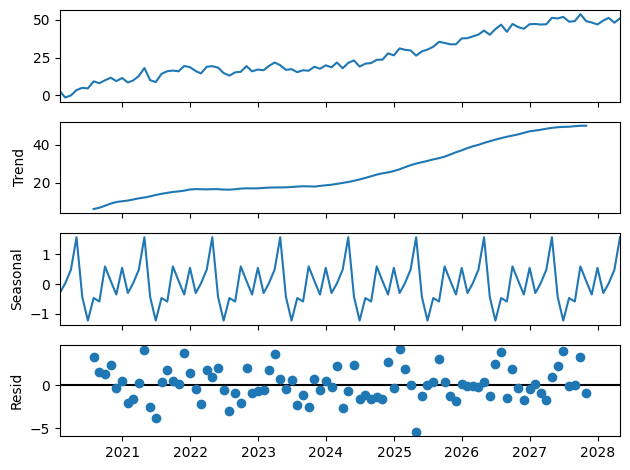


--- Decomposition Components ---
Trend Head:
2020-07-31     6.417057
2020-08-31     7.123565
2020-09-30     8.124999
2020-10-31     9.265951
2020-11-30    10.083714
Freq: ME, Name: trend, dtype: float64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a sample time series (as we did yesterday)
index = pd.date_range(start='2020', periods=100, freq='ME')
data = 5 * np.sin(np.linspace(0, 3*np.pi, 100)) + np.arange(100) * 0.5 + np.random.randn(100) * 2
ts = pd.Series(data, index=index)

# Perform decomposition using the Multiplicative Model
decomposition = seasonal_decompose(ts, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

# Accessing the individual components
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal
residual = decomposition.resid

print("\n--- Decomposition Components ---")
print("Trend Head:")
print(trend.head())